<a href="https://colab.research.google.com/github/myconcordia/COMP478/blob/main/Tutorial4COMP478.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
import os

print(cv2.__version__, cv2.__spec__)
#print(cv2.getBuildInformation())

4.6.0 ModuleSpec(name='cv2', loader=<_frozen_importlib_external.SourceFileLoader object at 0x7fec8a89be50>, origin='/usr/local/lib/python3.8/dist-packages/cv2/__init__.py', submodule_search_locations=['/usr/local/lib/python3.8/dist-packages/cv2'])


**Mount Google Drive: First mount and authenticate yourself**

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# After executing the cell above, Drive
# files will be present in "/content/drive/My Drive".
#Second change your current folder to point working folder My Drive
os.chdir("/content/drive/My Drive/")
os.listdir()

**Image Fillering in the Spatial Domain**

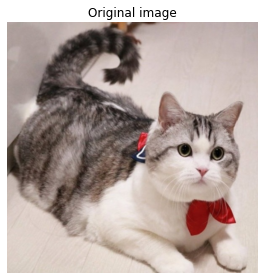

In [11]:
I = cv2.imread('./images/cat.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
fig = plt.figure()
plt.imshow(I), plt.title('Original image'), plt.axis('off')
plt.tight_layout()
plt.show()

**Unsharp filtering**

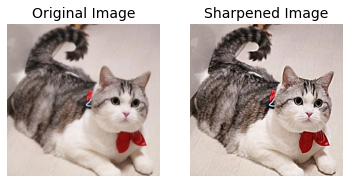

In [12]:
#https://homepages.inf.ed.ac.uk/rbf/HIPR2/unsharp.htm
k = 1   #unsharp masking
I_blurred = cv2.GaussianBlur(I, (11,11), 10)
J = cv2.addWeighted(I, 1.0 + k, I_blurred, -k, 0) # J = I + k*(I - I_blurred)
plt.figure('Unsharp masking')
plt.subplot(121),plt.imshow(I), 
plt.axis('off'), plt.title('Original Image', size=14)
plt.subplot(122),plt.imshow(J), 
plt.axis('off'), plt.title('Sharpened Image', size=14)
plt.show()

**Unsharp masking produces an edge image**

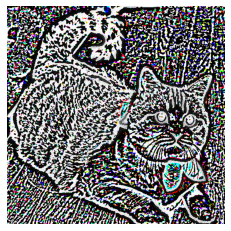

In [13]:
G = I - I_blurred
plt.figure('Unsharp mask')
plt.imshow(G), plt.axis('off')
plt.show()

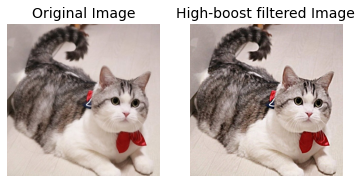

In [14]:
#High-boost filtering
k = 0.6      #Reasonable values for k vary between 0.2 and 0.7
I_blurred = cv2.GaussianBlur(I, (11,11), 10)
J = cv2.addWeighted(I, 1.0 + k, I_blurred, -k, 0) # J = I + k*(I - I_blurred)
plt.figure('High-boost filtering')
plt.subplot(121),plt.imshow(I), 
plt.axis('off'), plt.title('Original Image', size=14)
plt.subplot(122),plt.imshow(J), 
plt.axis('off'), plt.title('High-boost filtered Image', size=14)
plt.show()

**Spatial filtering**

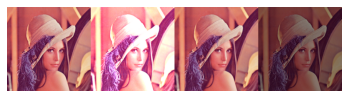

In [15]:
I = cv2.imread('./images/lenacolor512.jpg')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
gaussianBlurKernel = np.array(([[1, 2, 1], [2, 4, 2], [1, 2, 1]]), np.float32)/9
sharpenKernel = np.array(([[0, -1, 0], [-1, 9, -1], [0, -1, 0]]), np.float32)/9
meanBlurKernel = np.ones((3, 3), np.float32)/9
gaussianBlur = cv2.filter2D(I, -1, gaussianBlurKernel)
meanBlur = cv2.filter2D(I, -1, kernel=meanBlurKernel)
sharpen = cv2.filter2D(I, -1, kernel=sharpenKernel)
horizontalStack = cv2.hconcat([I, gaussianBlur, meanBlur, sharpen])
plt.figure('Spatial filtering')
plt.imshow(horizontalStack), plt.axis('off')
plt.show()

**Image Kernels**

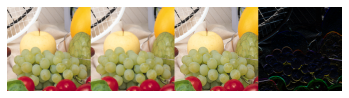

In [16]:
I = cv2.imread('./images/fruits.png')
I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
LPKernel = np.ones((3, 3), np.float32)/9
HPKernel = np.array(([[0, -1, 0], [-1, 5, -1], [0, -1, 0]]), np.float32)
HEKernel = np.array(([[1, 1, 1], [0, 0, 0], [-1, -1, -1]]), np.float32)
LPfilter = cv2.filter2D(I, -1, LPKernel)
HPfilter = cv2.filter2D(I, -1, HPKernel)
HEfilter = cv2.filter2D(I, -1, HEKernel)
Results = cv2.hconcat([I, LPfilter, HPfilter, HEfilter])
plt.figure('Image Kernels')
plt.imshow(Results), plt.axis('off')
plt.show()

**Emboss Filters**

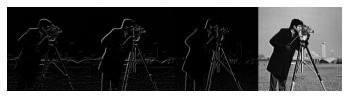

In [17]:
I = cv2.imread('./images/cameraman.png')
#I = cv2.cvtColor(I, cv2.COLOR_BGR2RGB)
K1 = np.array(([[0, 1, 0], [0, 0, 0], [0, -1, 0]]), np.float32)
K2 = np.array(([[1, 0, 0], [0, 0, 0], [0, 0, -1]]), np.float32)
K3 = np.array(([[0, 0, 0], [1, 0, -1], [0, 0, 0]]), np.float32)
K4 = np.array(([[0, 1, -1], [0, 0, 0], [1, 0, 0]]), np.float32)
K1filter = cv2.filter2D(I, -1, K1)
K2filter = cv2.filter2D(I, -1, K2)
K3filter = cv2.filter2D(I, -1, K3)
K4filter = cv2.filter2D(I, -1, K4)
Emboss = cv2.hconcat([K1filter, K2filter, K3filter, K4filter])
plt.figure('Emboss Filters')
plt.imshow(Emboss), plt.axis('off')
plt.show()

**Correlation vs. Convolution**

In [18]:
from scipy.signal import convolve2d

f = np.array([[1,2,0,1,2],
              [2,3,1,1,2],
              [1,4,2,2,0],
              [3,2,3,3,0],
              [1,0,0,2,1]
              ], dtype=np.uint8)

w = np.array([[1,1,1],
              [1,1,2],
              [2,1,1]], dtype=np.uint8)

print(convolve2d(f, w, mode="same"))
print("-------")
#flip the kernel around both axes
print(cv2.filter2D(f, -1, cv2.flip(w, -1), borderType=cv2.BORDER_CONSTANT))

[[ 8 10 10  7  7]
 [15 18 20 14  9]
 [18 23 26 18 10]
 [15 21 22 16 11]
 [ 8 13 13  9  8]]
-------
[[ 8 10 10  7  7]
 [15 18 20 14  9]
 [18 23 26 18 10]
 [15 21 22 16 11]
 [ 8 13 13  9  8]]


In [19]:
f = np.array([[ 1,  5,  0], 
              [ 7,  2,  9], 
              [ 2,  3,  4]
              ], dtype=np.uint8)
w = np.array([[1, 2],
              [3, 4]], dtype=np.uint8)

#Correlation
print("Correlation:")
print(cv2.filter2D(f, -1, w))
#flip the kernel around both axes
print("Convolution using cv2filter2D with flip around both axes:")
print(cv2.filter2D(f, -1, cv2.flip(w, -1), borderType=cv2.BORDER_CONSTANT))
#Another way of computing convolution
from scipy.signal import convolve2d
print("Convolution using convolve2d:")
print(convolve2d(f, w, mode="same"))

Correlation:
[[35 34 35]
 [41 40 47]
 [33 29 45]]
Convolution using cv2filter2D with flip around both axes:
[[ 1  7 10]
 [10 35 33]
 [23 41 45]]
Convolution using convolve2d:
[[ 1  7 10]
 [10 35 33]
 [23 41 45]]


In [20]:
from scipy.signal import convolve2d

f = np.array([[1,2,0,1,2],
              [2,3,1,1,2],
              [1,4,2,2,0],
              [3,2,3,3,0],
              [1,0,0,2,1]
              ], dtype=np.uint8)

w = np.array([[1,1,1],
              [1,1,2],
              [2,1,1]], dtype=np.uint8)

print(convolve2d(f, w, mode="same"))
print("-------")
#flip the kernel around both axes
print(cv2.filter2D(f, -1, cv2.flip(w, -1), borderType=cv2.BORDER_CONSTANT))

[[ 8 10 10  7  7]
 [15 18 20 14  9]
 [18 23 26 18 10]
 [15 21 22 16 11]
 [ 8 13 13  9  8]]
-------
[[ 8 10 10  7  7]
 [15 18 20 14  9]
 [18 23 26 18 10]
 [15 21 22 16 11]
 [ 8 13 13  9  8]]


In [21]:
f = np.array([[1, 5, 0], 
              [7, 2, 9], 
              [2, 3, 4]], dtype=np.uint8)

w = np.array([[1, 2, 1],
              [2, 4, 2],
              [1, 2, 1]], dtype=np.uint8)

#Correlation (borderType=cv2.BORDER_CONSTAN: Pad the image with a constant value (i.e. black or 0)
print("Correlation:")
print(cv2.filter2D(f, -1, w, borderType=cv2.BORDER_CONSTANT))

#print(convolve2d(f, w, mode="same"))

Correlation:
[[30 42 30]
 [46 63 56]
 [30 44 42]]


In [22]:
f = np.array([[1, 5, 0], 
              [7, 2, 9], 
              [2, 3, 4]], dtype=np.uint8)

w = np.array([[1, 0, 1],
              [0, 1, 0],
              [1, 0, 1]], dtype=np.uint8)

#Correlation (borderType=cv2.BORDER_CONSTAN: Pad the image with a constant value (i.e. black or 0)
print("Correlation:")
print(cv2.filter2D(f, -1, w, borderType=cv2.BORDER_CONSTANT))

Correlation:
[[ 3 21  2]
 [15  9 17]
 [ 4 19  6]]
